# Exercise with Natural Language Processing

For todays exersice we will be doing two things.  The first is to build the same model with the same data that we did in the lecture, the second will be to build a new model with new data. 

## PART 1: 
- 20 Newsgroups Corpus


## PART 2:
- Republican vs Democrat Tweet Classifier

In [83]:
# Import pandas for data handling
import pandas as pd

# NLTK is our Natural-Language-Took-Kit
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Libraries for helping us with strings
import string
# Regular Expression Library
import re

# Import our text vectorizers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


# Import our classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier


# Import some ML helper function
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

# Import our metrics to evaluate our model
from sklearn import metrics
from sklearn.metrics import classification_report


# Library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# You may need to download these from nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zbbxh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\zbbxh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\zbbxh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Load and display data.
1. Load the 20-newsgroups.csv data into a dataframe.
1. Print the shape
1. Inspect / remove nulls and duplicates
1. Find class balances, print out how many of each topic_category there are.

In [2]:
# 1. Load the 20-newsgroups.csv data into a dataframe.
# 2. Print the shape
df = pd.read_csv('data/20-newsgroups.csv')

df.head()

,id,message,topic,topic_category
0,0,From: lerxst@wam.umd.edu (where's my thing)\r\...,7,rec.autos
1,1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware
2,2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware
3,3,From: jgreen@amber (Joe Green)\r\nSubject: Re:...,1,comp.graphics
4,4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space


In [3]:
# 3. Inspect / remove nulls and duplicates
df.isnull().sum()

id                0
message           0
topic             0
topic_category    0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
# 4. Find class balances, print out how many of each topic_category there are.
df.topic_category.value_counts()

rec.sport.hockey            600
soc.religion.christian      599
rec.motorcycles             598
rec.sport.baseball          597
sci.crypt                   595
rec.autos                   594
sci.med                     594
comp.windows.x              593
sci.space                   593
comp.os.ms-windows.misc     591
sci.electronics             591
comp.sys.ibm.pc.hardware    590
misc.forsale                585
comp.graphics               584
comp.sys.mac.hardware       578
talk.politics.mideast       564
talk.politics.guns          546
alt.atheism                 480
talk.politics.misc          465
talk.religion.misc          377
Name: topic_category, dtype: int64

# Text Pre-Processing 
(aka Feature engineering)
1. Make a function that makes all text lowercase.
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
2. Make a function that removes all punctuation. 
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
3. Make a function that removes all stopwords.
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
4. EXTRA CREDIT (This step only): Make a function that stemms all words. 


5. Mandatory: Make a pipeline function that applys all the text processing functions you just built.
    * Do a sanity check by feeding in a test sentence into the pipeline. 
    
    
    
6. Mandatory: Use `df['message_clean'] = df[column].apply(???)` and apply the text pipeline to your text data column. 

In [6]:
# 1. Make a function that makes all text lowercase.

def lower_text(a_string):
    return a_string.lower()

test_string = 'This is A SENTENCE with LOTS OF CAPS.'
lower_text(test_string)

'this is a sentence with lots of caps.'

In [7]:
# 2. Make a function that removes all punctuation. 

# Using regex
def remove_punctuation(a_string):
    a_string = re.sub(r'[^\w\s]','',a_string)
    return a_string

test_string = 'This is a sentence! 50 With lots of punctuation??? & other #things.'
remove_punctuation(test_string)

'This is a sentence 50 With lots of punctuation  other things'

In [8]:
# 3. Make a function that removes all stopwords.

def remove_stopwords(a_string):
    # Split sentence into words
    words = word_tokenize(a_string)
    
    valid_words = []
    
    for word in words:
        if word not in stopwords:
            valid_words.append(word)
    
    a_string = ' '.join(valid_words)
    
    return a_string

test_string = 'This is a sentence! With some different stopwords i have added in here.'
remove_stopwords(test_string)

'This sentence ! With different stopwords added .'

In [9]:
# 4. EXTRA CREDIT: Make a function that stemms all words. 
porter = PorterStemmer()

def stemSentence(a_string):
    
    token_words = word_tokenize(a_string)
    stem_sentence=[]
    
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

test_string = 'I played and started playing with players and we all love to play with plays'
stemSentence(test_string)


'i play and start play with player and we all love to play with play '

In [10]:
# 5. MANDATORY: Make a pipeline function that applys all the text processing functions you just built.

def text_pipeline(a_string):
    a_string = lower_text(a_string)
    a_string = remove_punctuation(a_string)
    a_string = remove_stopwords(a_string)
    a_string = stemSentence(a_string)
    
    return a_string

test_string = 'I played and started playing with players and we all love to play with plays'
text_pipeline(test_string)

'play start play player love play play '

In [11]:
# 6. Mandatory: Use `df[column].apply(???)` and apply the text pipeline to your text data column. 
df['message_clean'] = df['message'].apply(text_pipeline)

print("ORIGINAL TEXT:", df['message'][0])
print("CLEANDED TEXT:", df['message_clean'][0])

ORIGINAL TEXT: From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----





CLEANDED TEXT: lerxstwamumdedu where thing subject car nntppostinghost rac3wamumdedu organ univers maryland colleg park line 15 wonder anyon could enlighten car saw day 2door sport car look late 60 earli 70 call bricklin door realli small addit front bumper separ

# Text Vectorization

1. Define your `X` and `y` data. 


2. Initialize a vectorizer (you can use TFIDF or BOW, it is your choice).
    * Do you want to use n-grams..?


3. Fit your vectorizer using your X data.
    * Remember, this process happens IN PLACE.


4. Transform your X data using your fitted vectorizer. 
    * `X = vectorizer.???`



5. Print the shape of your X.  How many features (aka columns) do you have?

In [37]:
# 1. Define your `X` and `y` data. 

X = df['message_clean'].values
y = df['topic_category'].values

In [38]:
# 2. Initialize a vectorizer (you can use TFIDF or BOW, it is your choice).

vectorizer = TfidfVectorizer()

In [39]:
# 3. Fit your vectorizer using your X data

# initialize vectorizer

vectorizer.fit(X)

TfidfVectorizer()

In [40]:
# 4. Transform your X data using your fitted vectorizer. 

X = vectorizer.transform(X)

print(X.shape, type(X))

(11314, 119708) <class 'scipy.sparse._csr.csr_matrix'>


In [41]:
# 5. Print the shape of your X.  How many features (aka columns) do you have?

features = vectorizer.get_feature_names()
weights = vectorizer.idf_

print(len(features), len(weights))

df_idf = pd.DataFrame.from_dict({'feature':features,'idf': weights})

df_idf = df_idf.sort_values(by='idf', ascending=False)

df_idf

119708 119708


C:\Users\zbbxh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,feature,idf
59854,konstantinopoli,9.640737
70532,maxutu72pl707u7vznlznkjznki8f727b9nevz,9.640737
70529,maxson,9.640737
70528,maxslinkynyuedu,9.640737
70527,maxslinkycsnyuedu,9.640737
...,...,...
23975,articl,1.818293
116644,write,1.623100
87442,organ,1.038284
62061,line,1.002832


# Split your data into Training and Testing data. 

In [42]:
# Split our data into testing and training like always. 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

___
# Build and Train Model
Use Multinomial Naive Bayes to classify these documents. 

1. Initalize an empty model. 
2. Fit the model with our training data.


Experiment with different alphas.  Use the alpha gives you the best result.

EXTRA CREDIT:  Use grid search to programmatically do this for you. 

In [43]:
# 1. Initalize an empty model. 

model = MultinomialNB(alpha=.05)

In [44]:
# Fit our model with our training data.

model.fit(X_train, y_train)

MultinomialNB(alpha=0.05)

# Evaluate the model.

1. Make new predicitions using our test data. 
2. Print the accuracy of the model. 
3. Print the confusion matrix of our predictions. 
4. Using `classification_report` print the evaluation results for all the classes. 



In [45]:
# 1. Make new predictions of our testing data. 

y_pred = model.predict(X_test)

y_pred_proba = model.predict_proba(X_test)


In [46]:
# 2. Print the accuracy of the model. 
accuracy = model.score(X_test, y_test)

print("Model Accuracy: %f" % accuracy)

Model Accuracy: 0.914715


C:\Users\zbbxh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


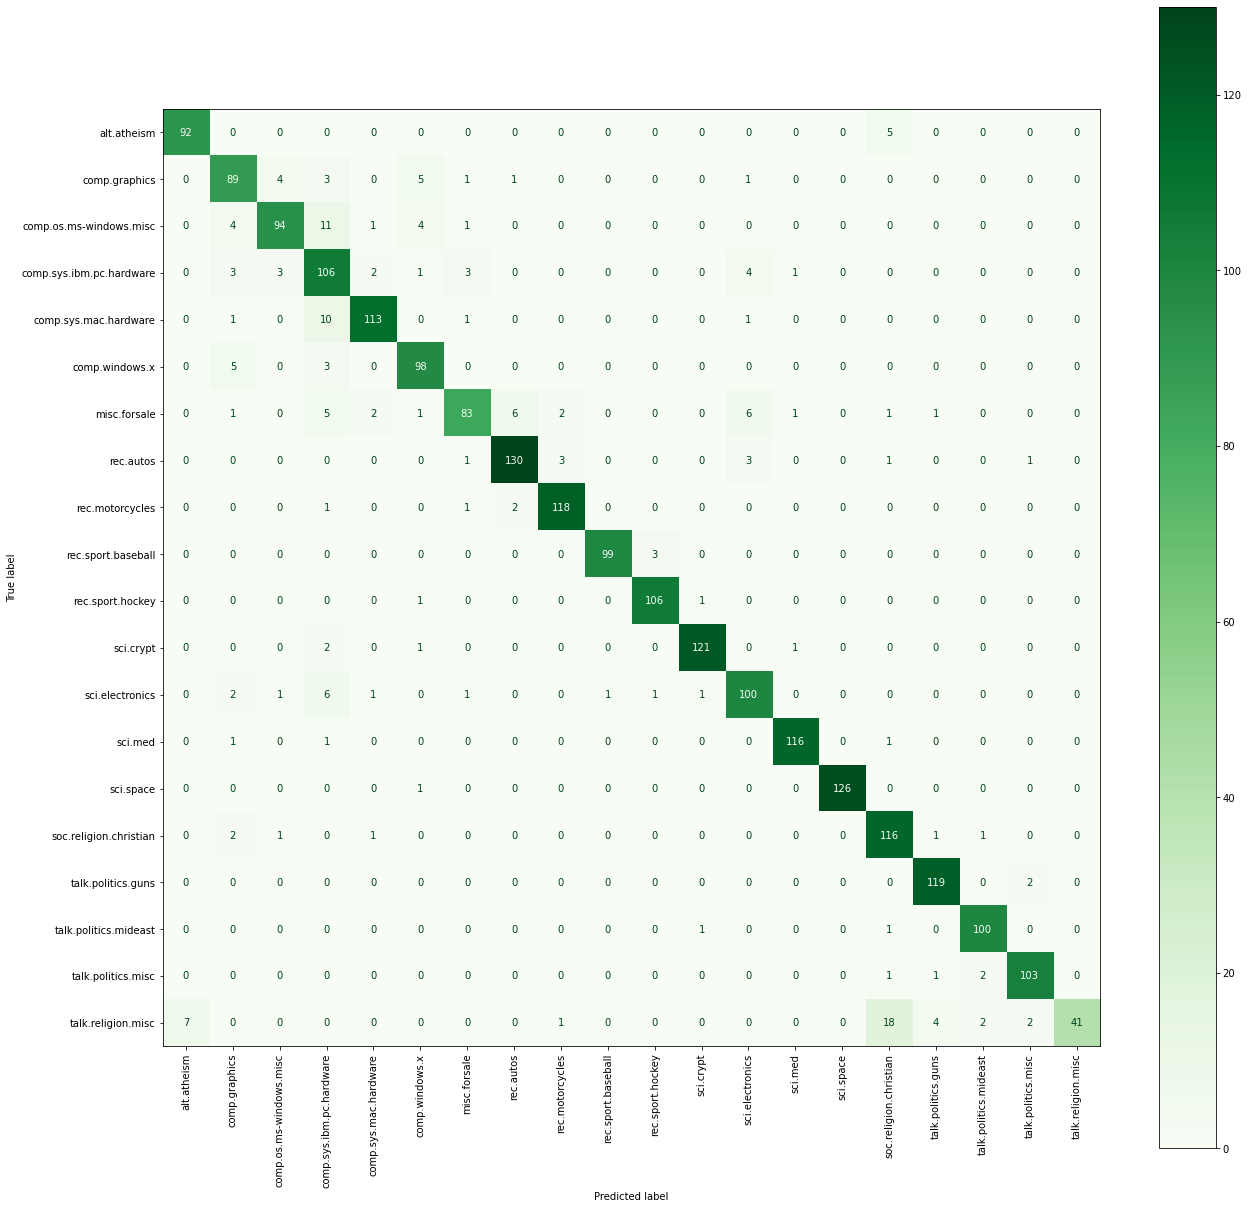

In [47]:
# 3. Plot the confusion matrix of our predictions

fig, ax = plt.subplots(figsize=(21,21))

cm = plot_confusion_matrix(model, X_test, y_test,
                          display_labels=model.classes_,
                          cmap='Greens', ax=ax)
plt.xticks(rotation=90)
cm

In [50]:
# 4. Using `classification_report` print the evaluation results for all the classes. 

print(classification_report(y_test, y_pred, target_names=model.classes_))

                          precision    recall  f1-score   support

             alt.atheism       0.93      0.95      0.94        97
           comp.graphics       0.82      0.86      0.84       104
 comp.os.ms-windows.misc       0.91      0.82      0.86       115
comp.sys.ibm.pc.hardware       0.72      0.86      0.78       123
   comp.sys.mac.hardware       0.94      0.90      0.92       126
          comp.windows.x       0.88      0.92      0.90       106
            misc.forsale       0.90      0.76      0.83       109
               rec.autos       0.94      0.94      0.94       139
         rec.motorcycles       0.95      0.97      0.96       122
      rec.sport.baseball       0.99      0.97      0.98       102
        rec.sport.hockey       0.96      0.98      0.97       108
               sci.crypt       0.98      0.97      0.97       125
         sci.electronics       0.87      0.88      0.87       114
                 sci.med       0.97      0.97      0.97       119
         

# Manual predicition
Write a new sentence that you think will be classified as talk.politics.guns. 
1. Apply the text pipeline to your sentence
2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`
    * Note, the `transform` function accepts a list and not a individual string.
3. Use the model to predict your new `X`. 
4. Print the prediction

In [56]:
my_sentence = 'People who have mental health issues should not have guns.'

# 1. Apply the text pipeline to your sentence
cleaned_text = text_pipeline(my_sentence)

# 2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`\
X = vectorizer.transform([cleaned_text])

# 3. Use the model to predict your new `X`. 
model.predict(X)

array(['talk.politics.guns'], dtype='<U24')

___
# PART 2: Twitter Data
This part of the exercise is un-guided on purpose.  

Using the `dem-vs-rep-tweets.csv` build a classifier to determine if a tweet was written by a democrat or republican. 

Can you get an f1-score higher than %82

In [68]:
# 1. Load the 20-newsgroups.csv data into a dataframe.
# 2. Print the shape
df = pd.read_csv('data/dem-vs-rep-tweets.csv')
df.head(5)

,Party,Handle,Tweet
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P..."
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...


In [69]:
# check nulls and duplicates value
df.isnull().sum()

Party     0
Handle    0
Tweet     0
dtype: int64

In [71]:
df.duplicated().sum()

57

In [72]:
print("Before: ",df.shape)

df = df.drop_duplicates()
print("After: ",df.shape)

Before:  (86460, 3)
After:  (86403, 3)


In [73]:
# See the party balance
df.Party.value_counts()

Republican    44362
Democrat      42041
Name: Party, dtype: int64

In [74]:
# Cleaned tweet using pipeline function
df['tweet_clean'] = df['Tweet'].apply(text_pipeline)

print("Original tweet: ", df['Tweet'][0])
print("Cleaned tweet: ", df['tweet_clean'][0])

Original tweet:  Today, Senate Dems vote to #SaveTheInternet. Proud to support similar #NetNeutrality legislation here in the House… https://t.co/n3tggDLU1L
Cleaned tweet:  today senat dem vote savetheinternet proud support similar netneutr legisl hous httpstcon3tggdlu1l 


In [75]:
df.head()

,Party,Handle,Tweet,tweet_clean
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P...",today senat dem vote savetheinternet proud sup...
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...,rt winterhavensun winter resid alta vista teac...
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...,rt nbclatino repdarrensoto note hurrican maria...
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...,rt nalcabpolici meet repdarrensoto thank take ...
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...,rt vegalteno hurrican season start june 1st pu...


In [76]:
# Define the X and y

X = df['tweet_clean'].values
y = df['Party'].values

In [79]:
# Split data into testing and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# initializze vectorizer 
vectorizer = TfidfVectorizer()

vectorizer.fit(X_train)

# tranforms documents into vectors
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

print(X_train.shape, type(X))

(69122, 101702) <class 'numpy.ndarray'>


In [80]:
features = vectorizer.get_feature_names()
weights = vectorizer.idf_

print(len(features), len(weights))

df_idf = pd.DataFrame.from_dict( {'feature': features, 'idf': weights})

df_idf = df_idf.sort_values(by='idf', ascending=False)

df_idf

101702 101702


C:\Users\zbbxh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,feature,idf
50851,httpstcomjulusrbwu,11.450496
54390,httpstcoolqacj0dt2,11.450496
54397,httpstcooltr8qvnz8,11.450496
54396,httpstcooltmasoma4,11.450496
54395,httpstcoolthxcfpo3,11.450496
...,...,...
100882,work,3.973740
95916,thank,3.581094
4622,amp,3.348818
96634,today,3.311055


# MultinomialNB model

In [81]:
# Initialize MultinomialNB model
model = MultinomialNB(alpha=.05)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [94]:
f1 = f1_score(y_test, y_pred, pos_label='Republican')
print("MultinomialNB model f1 socre for Republican is: ", f1.round(4) )

MultinomialNB model f1 socre for Republican is:  0.8233


In [95]:
f1 = f1_score(y_test, y_pred, pos_label='Democrat')
print("MultinomialNB model f1 socre for Democrat is: ", f1.round(4) )

MultinomialNB model f1 socre for Democrat is:  0.8074
